In [30]:
import itertools

import numpy as np
import pandas as pd

import altair as alt
import bokeh.io

import bebi103
import altair_catplot as altcat

bokeh.io.output_notebook()

Loading BokehJS ...

In [3]:
# 1a)

df = pd.read_csv('../data/anderson-fisher-iris.csv',
                 #delimiter = '\t',
                 comment = '#',
                 header = [0,1])
# Take a look.

df.head()

setosa                                                      \
  sepal length (cm) sepal width (cm) petal length (cm) petal width (cm)   
0               5.1              3.5               1.4              0.2   
1               4.9              3.0               1.4              0.2   
2               4.7              3.2               1.3              0.2   
3               4.6              3.1               1.5              0.2   
4               5.0              3.6               1.4              0.2   

         versicolor                                                      \
  sepal length (cm) sepal width (cm) petal length (cm) petal width (cm)   
0               7.0              3.2               4.7              1.4   
1               6.4              3.2               4.5              1.5   
2               6.9              3.1               4.9              1.5   
3               5.5              2.3               4.0              1.3   
4               6.5              2.8               4.6              1.5   

          virginica                                                      
  sepal length (cm) sepal width (cm) petal length (cm) petal width (cm)  
0               6.3              3.3               6.0              2.5  
1               5.8              2.7               5.1              1.9  
2               7.1              3.0               5.9              2.1  
3               6.3              2.9               5.6              1.8  
4               6.5              3.0               5.8              2.2

**1b)**
As shown above, the dataframe is not tidy. It does not have each variable form a column since it has data of one variable 'species' column by column instead of taking it as a separate column, also leading to repeating columns for one specific variable to separate data from different species. It does have each observation in a row though.

In [4]:
df_tidy = df.stack(level=0)

df_tidy.head()

petal length (cm)  petal width (cm)  sepal length (cm)  \
0 setosa                    1.4               0.2                5.1   
  versicolor                4.7               1.4                7.0   
  virginica                 6.0               2.5                6.3   
1 setosa                    1.4               0.2                4.9   
  versicolor                4.5               1.5                6.4   

              sepal width (cm)  
0 setosa                   3.5  
  versicolor               3.2  
  virginica                3.3  
1 setosa                   3.0  
  versicolor               3.2

**1c)**
The operation 'stack' reshaped the dataframe by stacking the specified horizontal index, i.e. here the first header of the dataframe, to vertical index. It re-organized the data grouped by species from being side by side on a horizontal position to being stacked vertically on top of each other. 

In [5]:
df_tidy = df_tidy.sort_index(level=1)

df_tidy.head()

,,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
0,setosa,1.4,0.2,5.1,3.5
1,setosa,1.4,0.2,4.9,3.0
2,setosa,1.3,0.2,4.7,3.2
3,setosa,1.5,0.2,4.6,3.1
4,setosa,1.4,0.2,5.0,3.6


The operation 'sort_index' sorted the data frame by the second (level=1) vertical index, which is the newly-added 'speicies' index, so that the data from one certain speicies were grouped together and stack on top of other species.

In [6]:
df_tidy = df_tidy.reset_index(level=1)

df_tidy.head()

,level_1,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
0,setosa,1.4,0.2,5.1,3.5
1,setosa,1.4,0.2,4.9,3.0
2,setosa,1.3,0.2,4.7,3.2
3,setosa,1.5,0.2,4.6,3.1
4,setosa,1.4,0.2,5.0,3.6


From last operation, we had dataframe with two vertical indexes namely the speicies and the number of rows, while tidy data should have the variable 'speicies' as a column instead of the index, so here the reset_index operation remove the given level, which is the second index 'speicies' and make it column named 'level_1'.

In [7]:
df_tidy = df_tidy.rename(columns={'level_1': 'species'})

df_tidy.head()

,species,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
0,setosa,1.4,0.2,5.1,3.5
1,setosa,1.4,0.2,4.9,3.0
2,setosa,1.3,0.2,4.7,3.2
3,setosa,1.5,0.2,4.6,3.1
4,setosa,1.4,0.2,5.0,3.6


This operation changed the name of the first column from default 'level_1' to 'specieis'.'

**1d)**
The resulting dataframe is tidy because it has every variable in one column and each observation stacks on top of each other. It only has one type of observational unit, so one table is good.

In [28]:
# 1e)

inds = (df_tidy['species'] == 'versicolor')
SL_versicolor = df_tidy.loc[inds,['sepal length (cm)']].values

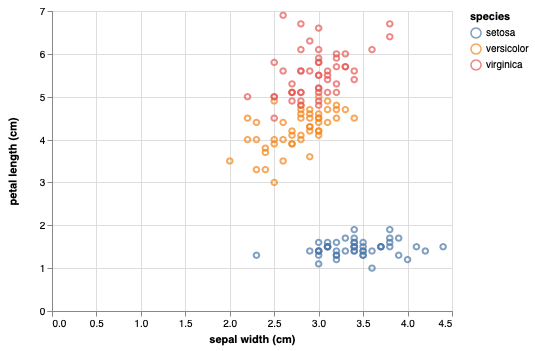

In [36]:
# 2a)

alt.Chart(df_tidy
    ).mark_point(
    ).encode(
        x='sepal width (cm):Q',
        y='petal length (cm):Q',
        color=alt.Color('species:N')
    )

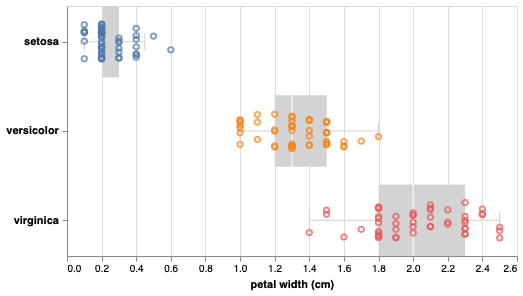

In [56]:
# 2b)

altcat.catplot(df_tidy,
               height=250,
               width=450,
               mark='point',
               encoding=dict(y=alt.Y('species:N', title=None),
                             x='petal width (cm):Q',
                             color=alt.Color('species:N', legend=None)),
               transform='jitterbox'
              ).configure_text(
                  fontWeight='bold'
              )

I chose Jitter plot along with box plot so that both all of the data and important summary statistics can be shown in this one fiugre. I assume at the very begining of EDA, we may care more about those more straightforward information rather than more general statistic information like ECDF.